### Tumour cell markers & DEGs

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
#import loompy
import matplotlib as mpl

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.settings.set_figure_params(dpi=80, color_map='viridis')
#sc.logging.print_versions()

In [2]:
input_file = '/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/T_NK_ILC_integration_PCA.h5ad'
adata = sc.read_h5ad(input_file)

In [3]:
adata.obs.loc[pd.isna(adata.obs['Site']), 'Site'] = "lesion"
Site_condition = [i + '_' +j for i, j in zip(list(adata.obs['integrated_sample_id']), list(adata.obs['Site']))]
adata.obs['Site_condition'] = Site_condition
adata.obs['Site_condition']

AAGTCTGGTTGTCTTT-1-SKN8104894-Healthy    Healthy_non_lesion
CTCCTAGAGCGATGAC-1-SKN8104894-Healthy    Healthy_non_lesion
GCGCCAACAGGATTGG-1-SKN8104894-Healthy    Healthy_non_lesion
AAACCTGAGAGTTGGC-1-SKN8104896-Healthy    Healthy_non_lesion
AAACCTGAGGAGTCTG-1-SKN8104896-Healthy    Healthy_non_lesion
                                                ...        
TTTGTCAAGGTTCCTA-1-40-CTCL                      CTCL_lesion
TTTGTCACACAGGAGT-1-40-CTCL                      CTCL_lesion
TTTGTCAGTACATCCA-1-40-CTCL                      CTCL_lesion
TTTGTCAGTTTGACTG-1-40-CTCL                      CTCL_lesion
TTTGTCATCCAGATCA-1-40-CTCL                      CTCL_lesion
Name: Site_condition, Length: 242305, dtype: object

In [4]:
ll = pd.read_csv('/home/jovyan/farm/CTCL/malignant_marker/donor1-8_tumorcell_list.2.xls', sep="\t")
ll

,type
AACTCAGGTACAAGTA-1-CTCL,tumourcell
AACTTTCTCTATGTGG-1-CTCL,tumourcell
AAGCCGCAGAAACGAG-1-CTCL,tumourcell
AAGGAGCAGACAGGCT-1-CTCL,tumourcell
AATCCAGTCACGAAGG-1-CTCL,tumourcell
...,...
TTTGGTTTCATAAAGG-1-40-CTCL,tumourcell
TTTGTCAAGGACATTA-1-40-CTCL,tumourcell
TTTGTCAAGGTTCCTA-1-40-CTCL,tumourcell
TTTGTCACACAGGAGT-1-40-CTCL,tumourcell


In [5]:
adata.obs['Tissue']

AAGTCTGGTTGTCTTT-1-SKN8104894-Healthy    Epidermis
CTCCTAGAGCGATGAC-1-SKN8104894-Healthy    Epidermis
GCGCCAACAGGATTGG-1-SKN8104894-Healthy    Epidermis
AAACCTGAGAGTTGGC-1-SKN8104896-Healthy    Epidermis
AAACCTGAGGAGTCTG-1-SKN8104896-Healthy    Epidermis
                                           ...    
TTTGTCAAGGTTCCTA-1-40-CTCL               Epidermis
TTTGTCACACAGGAGT-1-40-CTCL               Epidermis
TTTGTCAGTACATCCA-1-40-CTCL               Epidermis
TTTGTCAGTTTGACTG-1-40-CTCL               Epidermis
TTTGTCATCCAGATCA-1-40-CTCL               Epidermis
Name: Tissue, Length: 242305, dtype: category
Categories (2, object): ['Dermis', 'Epidermis']

In [6]:
adata.obs['type'] = ll['type']
adata.obs.loc[pd.isna(adata.obs['type']), 'type'] = "Others"
adata.obs['type']

AAGTCTGGTTGTCTTT-1-SKN8104894-Healthy        Others
CTCCTAGAGCGATGAC-1-SKN8104894-Healthy        Others
GCGCCAACAGGATTGG-1-SKN8104894-Healthy        Others
AAACCTGAGAGTTGGC-1-SKN8104896-Healthy        Others
AAACCTGAGGAGTCTG-1-SKN8104896-Healthy        Others
                                            ...    
TTTGTCAAGGTTCCTA-1-40-CTCL               tumourcell
TTTGTCACACAGGAGT-1-40-CTCL               tumourcell
TTTGTCAGTACATCCA-1-40-CTCL                   Others
TTTGTCAGTTTGACTG-1-40-CTCL                   Others
TTTGTCATCCAGATCA-1-40-CTCL               tumourcell
Name: type, Length: 242305, dtype: object

In [7]:
type_donor = [i + '_' +j for i, j in zip(list(adata.obs['type']), list(adata.obs['donor_id']))]
adata.obs['type_donor'] = type_donor
adata.obs['type_donor'].value_counts()

Others_CTCL7        54658
Others_CTCL6        15543
Others_E4           14792
Others_CTCL4        12917
Others_S4           12338
Others_E3           11858
Others_P2           11422
Others_S5            9793
Others_S1            9528
tumourcell_CTCL3     9168
tumourcell_CTCL1     8230
tumourcell_CTCL5     7754
Others_CTCL5         7312
tumourcell_CTCL8     6647
Others_S2            6256
Others_P3            5908
Others_P1            5758
Others_CTCL8         5508
Others_CTCL3         4457
Others_S3            4082
tumourcell_CTCL6     3798
tumourcell_CTCL7     3713
Others_CTCL2         3647
Others_E2            2440
tumourcell_CTCL2     1900
Others_CTCL1         1565
Others_E1             692
tumourcell_CTCL4      621
Name: type_donor, dtype: int64

In [8]:
#### only include lesional cells from AD, Ps and CTCL
adata_sub_1 = adata[adata.obs['Site_condition'].isin(['Healthy_non_lesion', 'CTCL_lesion', 'AD_lesion', 'Psoriasis_lesion'])]

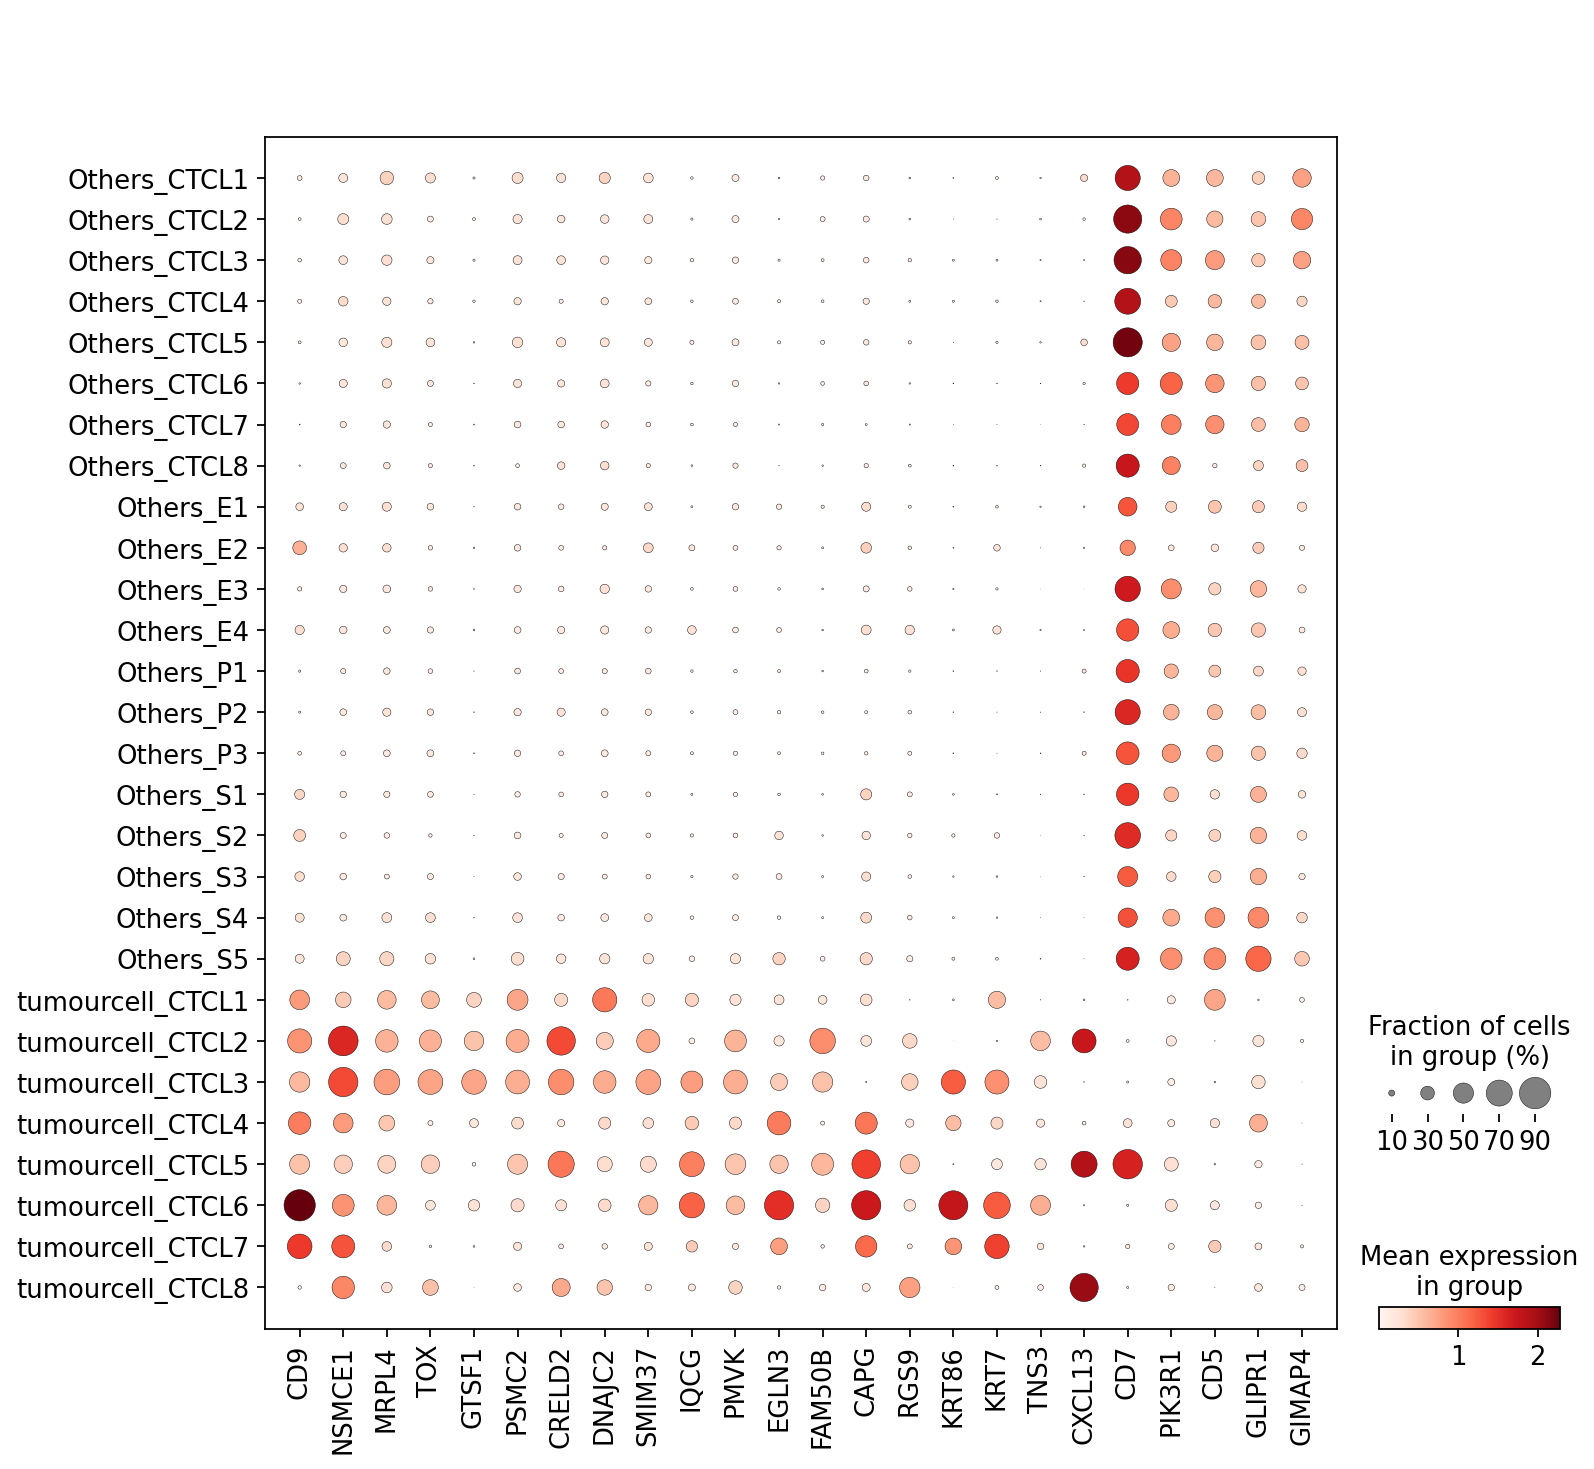

In [11]:
genes = ['CD9', "NSMCE1",'MRPL4','TOX','GTSF1','PSMC2','CRELD2','DNAJC2','SMIM37',
        'IQCG','PMVK','EGLN3','FAM50B','CAPG','RGS9','KRT86', 'KRT7','TNS3','CXCL13',
         'CD7','PIK3R1','CD5','GLIPR1','GIMAP4']
sc.settings.set_figure_params(dpi=80)
dp = sc.pl.dotplot(adata_sub_1, genes, groupby='type_donor',dendrogram=False, color_map='Reds', use_raw=True)

#### For edgeR: dermis vs epidermis

In [12]:
input_file = '/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/Tumourcell.normalised.noscale.h5ad'
adata = sc.read_h5ad(input_file)

In [13]:
tissue_donor = [i + '_' +j for i, j in zip(list(adata.obs['Tissue']), list(adata.obs['donor_id']))]
adata.obs['tissue_donor'] = tissue_donor
adata.obs['tissue_donor'] = adata.obs['tissue_donor'].astype('category')

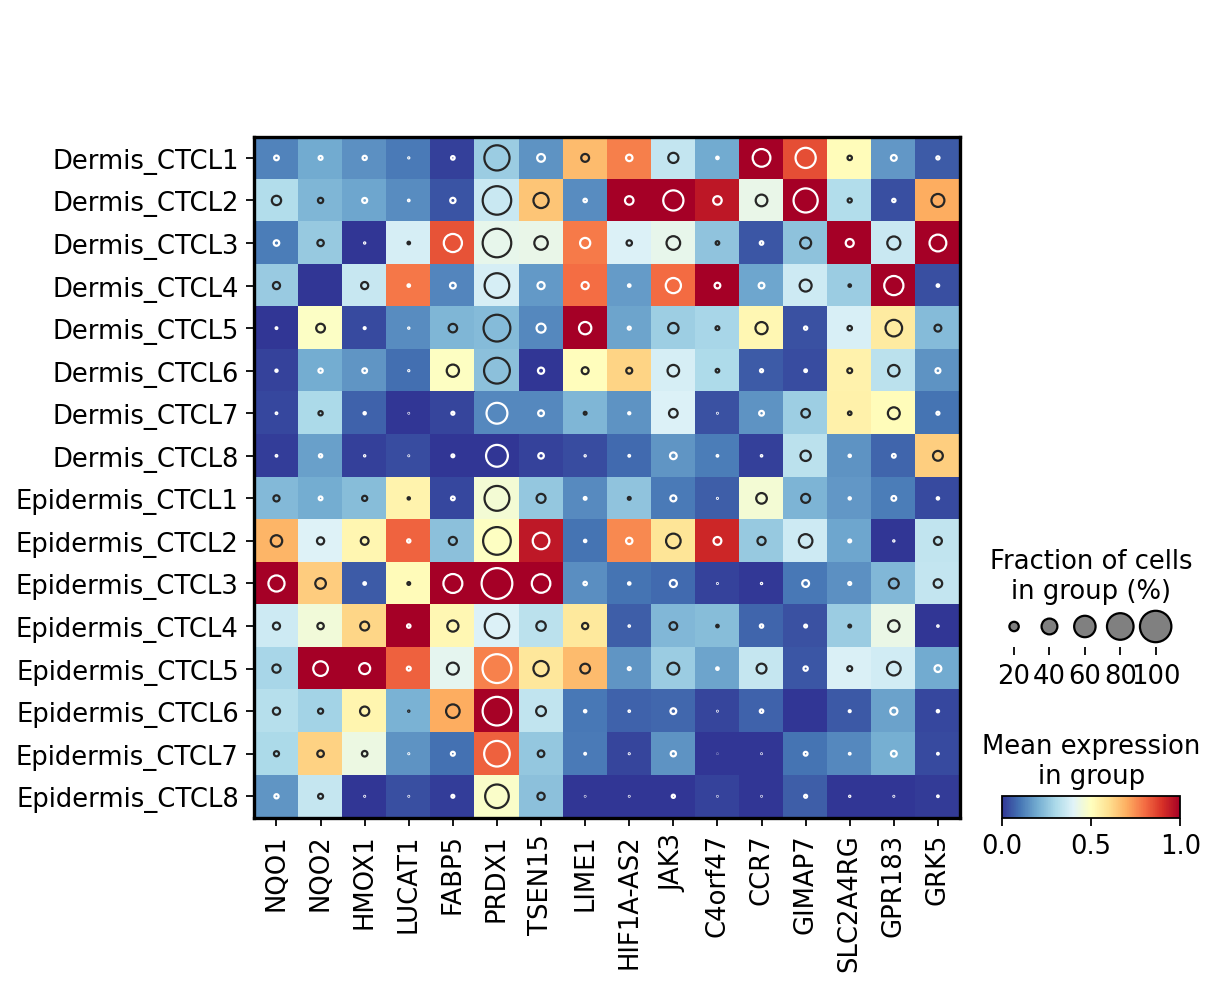

In [14]:
genes = ['NQO1','NQO2','HMOX1','LUCAT1','FABP5','PRDX1','TSEN15',
         'LIME1','HIF1A-AS2','JAK3','C4orf47','CCR7','GIMAP7','SLC2A4RG','GPR183','GRK5']
dp = sc.pl.dotplot(adata, var_names=genes, groupby='tissue_donor',dendrogram=False,
                   standard_scale='var',use_raw=True,var_group_rotation=0,swap_axes=False,return_fig=True)
dp.style(cmap='RdYlBu_r',color_on='square',dot_edge_color=None,dot_edge_lw=1).show()